## Lineære Systemer av Differensialligninger (MIP 11.1)

In [1]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra
    

In [25]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier
from python_linear_algebra.matrix_reduction import gauss_jordan
from python_linear_algebra.matrix_reduction import invers_matrise
import matplotlib.pyplot as plt

Et eksempel på **et system av lineære differensialligninger i kjemi** oppstår i **laserkjemi**, spesielt i samspillet mellom molekyler og lys. Et kjent tilfelle er **vibrasjons- eller elektronisk populasjonsdynamikk i eksiterte tilstander**.  

---

### **Eksempel: System av lineære differensialligninger i laserindusert fluorescens (LIF)**  
Når et molekyl absorberer en foton fra en laser, blir det eksitert til en høyere elektronisk eller vibrasjonsmessig tilstand. Populasjonen av molekyler i den eksiterte tilstanden utvikler seg over tid på grunn av:

1. **Spontan emisjon** – Molekylet går tilbake til grunntilstanden ved å sende ut en foton.  
2. **Stimuleret emisjon** – En annen foton med samme energi kan indusere molekylet til å sende ut lys.  
3. **Ikke-radiativ relaksasjon** – Molekylet mister energi uten å sende ut lys (f.eks. via kollisjoner eller intern konvertering).  

**Rate-ligningene** som beskriver disse overgangene, er et eksempel på **populasjonsdynamikk** i kjemi. Dette modelleres ofte ved hjelp av **Boltzmann-fordelingen** eller **rate-ligninger som Einstein-koeffisientene**.  

Denne typen populasjonsdynamikk er avgjørende for å forstå **reaksjonskinetikk, spektroskopi og fotokjemi**.

### **Kontinuerlig tids populasjonsdynamikk med en overgangsmatrise**  
Vi 
uttrykker populasjonsutviklingen som:  

$$
\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)
$$

hvor:

- $ \vec v(t) = \begin{bmatrix} v_g(t) \\ v_e(t) \end{bmatrix} $ representerer populasjonene ved tidspunkt $ t $.
- $ \frac {d}{dt} \vec v(t) = \begin{bmatrix} \frac{d}{dt}v_g(t) \\ \frac{d}{dt}v_e(t) \end{bmatrix} $ representerer endringsratene til populasjonene ved tidspunkt $ t $. (Husk at $\frac{d}{dt} f(t) = f'(t)$.)
- $ A $ er **overgangsmatrisen**, som bestemmer hvordan populasjonene endrer seg over tid.

Et enkelt valg for $ A $ er:

$$
A = \begin{bmatrix} 
- p & q \\ 
p & - q 
\end{bmatrix}
$$

hvor:
- $ p $ er sannsynligheten for overgang fra grunntilstanden til den eksiterte tilstanden per tidssteg.
- $ q $ er sannsynligheten for overgang fra den eksiterte tilstanden til grunntilstanden per tidssteg.

---

En **likevektstilstand**, er en tilstand $\vec w = \begin{bmatrix}w_g \\ w_e\end{bmatrix}$ slik at

$$
A \cdot \vec w = \vec 0
$$

For å finne likevektstilstandene løser vi:
$$
\begin{bmatrix} 
- p & q \\ 
p & - q 
\end{bmatrix}
\begin{bmatrix} w_g \\ w_e \end{bmatrix}
=
\begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

Bemert at hvis $\vec(0) = \vec w$ er en likevektstilstand, da er funksjonen $\vec v (t) = \vec w$ en løsning til differensialligningssystemet $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$.

For å finne en likevektstilstand gjør vi Gauss Jordan radeliminasjon på matrisen $A$:

$$A 
=
\begin{bmatrix} -p & q \\ p & -q \end{bmatrix}
\sim
\begin{bmatrix} p & -q \\ 0 & 0 \end{bmatrix}
.
$$

Her er andre parameter $w_e$ fri, og $pw_g - qw_e = 0$ slik at 
$$\frac{w_e}{w_g} = \frac{p}{q}$$

Det vil si at $w_g = q$ og $w_e = p$ gir en likevektstilstand $\vec w = \begin{bmatrix}q \\ p\end{bmatrix}$.

Vi har sett at egenverdier og egenvektorer kan være nyttige. Her er  $\vec w = \begin{bmatrix}q \\ p\end{bmatrix}$ en egenvektor for $A$ med tilhørende egenverdi $1$.

Fra analysen vi gjorde av matrisedynamikk kan vi også finne egenvektorer og egenverdier til matrisen $A$. Vi så at matrisen
$$I + A = \begin{bmatrix} 
1 - p & q \\ 
p & 1 - q 
\end{bmatrix}$$

Har egenverdiene $1$ og $1-(p+q)$. 

# Laserindusert fluorescens med natriumatomer (Na)

Vi ser på et system av lineære differensialligninger som beskriver laserindusert fluorescens for natriumatomer. Natrium har en velkjent overgang mellom grunntilstanden $3s$ og den eksiterte tilstanden $3p$ med en bølgelengde på ca. **589 nm** (den gule D-linjen i natrium).

## Parametere

1. **Laserintensitet ($I$)**: $I = 10^4 \, \text{W/m}^2$.
2. **Absorpsjonskrysningsseksjon ($\sigma$)**: $\sigma = 10^{-16} \, \text{m}^2$.
3. **Spontan de-eksiteringsrate ($\Gamma$)**: $\Gamma = 6 \cdot 10^7 \, \text{s}^{-1}$.

## System av differensialligninger

Vi har to populasjoner: $N_1(t)$ (grunntilstand) og $N_2(t)$ (eksitert tilstand). Systemet av differensialligninger er:

1. **Endring i $N_1(t)$**:
   $$
   \frac{dN_1}{dt} = -\sigma I N_1 + \Gamma N_2
   $$
   Med verdiene satt inn:
   $$
   \frac{dN_1}{dt} = - (10^{-16} \cdot 10^4) N_1 + (6 \cdot 10^7) N_2
   $$
   Forenklet:
   $$
   \frac{dN_1}{dt} = -10^{-12} N_1 + 6 \cdot 10^7 N_2
   $$

2. **Endring i $N_2(t)$**:
   $$
   \frac{dN_2}{dt} = \sigma I N_1 - \Gamma N_2
   $$
   Med verdiene satt inn:
   $$
   \frac{dN_2}{dt} = (10^{-16} \cdot 10^4) N_1 - (6 \cdot 10^7) N_2
   $$
   Forenklet:
   $$
   \frac{dN_2}{dt} = 10^{-12} N_1 - 6 \cdot 10^7 N_2
   $$

## Steady-state løsning

I steady-state er $\frac{dN_1}{dt} = 0$ og $\frac{dN_2}{dt} = 0$. Da får vi:
$$
0 = -10^{-12} N_1 + 6 \cdot 10^7 N_2
$$
$$
0 = 10^{-12} N_1 - 6 \cdot 10^7 N_2
$$

Disse to ligningene er ekvivalente, og vi kan løse for forholdet mellom $N_1$ og $N_2$:
$$
10^{-12} N_1 = 6 \cdot 10^7 N_2
$$
$$
\frac{N_2}{N_1} = \frac{10^{-12}}{6 \cdot 10^7} = \frac{1}{6 \cdot 10^{19}}
$$

Dette betyr at i steady-state er populasjonen i den eksiterte tilstanden $N_2$ svært liten sammenlignet med populasjonen i grunntilstanden $N_1$, noe som er typisk for laserindusert fluorescens med lav laserintensitet.

## Tidsavhengig løsning

Hvis vi antar at systemet starter med alle atomene i grunntilstanden, dvs. $N_1(0) = N_0$ og $N_2(0) = 0$, kan systemet av differensialligninger løses numerisk (for eksempel ved hjelp av Python eller MATLAB) eller analytisk ved hjelp av Laplace-transformasjoner.

---

Håper dette eksempelet var nyttig! Hvis du ønsker mer detaljer eller hjelp med å løse systemet numerisk/analytisk, bare si ifra. 😊

## Oppgave

Forklar hvorfor egenverdiene til $A$ er $0$ og $-(p+q)$.

---

## Oppgave

Finn en egenvektor $\vec u$ for $A$ med egenverdi $-(p+q)$.

## Oppgave

La $v(t) = e^{-(p+q) t} \vec u$. Sjekk at 
$\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med $\vec v(0) = \vec u$.

## Oppgave

La $x$ og $y$ være to tall og la $\vec v(t) = x\cdot e^{-(p+q)t} \cdot \vec u + y\cdot \vec w$. Sjekk at $\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = x \cdot \vec u + y \cdot \vec w$.

## Oppgave

La $A$ være en 2 x 2 matrise med egenverdier $\lambda_1$ og $\lambda_2$ og egenvektorer $\vec w_1$ og $\vec w_2$ med 
$A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_.$

La $x$ og $y$ være to tall og la $\vec v(t) = x\cdot e^{\lambda_1 t} \cdot \vec w_1 + y \cdot e^{\lambda_2 t} \cdot \vec w_2$. Sjekk at $\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = x \cdot \vec w_1 + y \cdot \vec w_2$.

## Oppgave

La 
$A=\begin{bmatrix}-1 & 2\\-3 &4\end{bmatrix}$ og la $\vec v_0 = \begin{bmatrix}1\\0\end{bmatrix}$. Finn en løsning til differensialligningssystemet $\frac{d}{dt} \vec v(t) 
= A \cdot \vec v(t)$ med $\vec v(0) = \vec v_0$ ved at følge stegene under.

1. Finn egenverdier $\lambda_1$ og $\lambda_2$ for $A$ og egenvektorer $\vec w_1$ og $\vec w_2$ med $A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_.$
2. Finn tall $x$ og $y$ slik at $\vec v_0 = x \cdot \vec w_1 + y \cdot \vec w_2$.
3. Sjekk at $\vec v(t) = x\cdot e^{\lambda_1 t} \cdot \vec w_1 + y \cdot e^{\lambda_2 t} \cdot \vec w_2$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = \vec v_0$.


# Trenivåsystem i Natrium (Na)

Natrium har en grunntilstand ($3s$) og eksiterte tilstander ($3p$ og $4s$), som kan brukes til å konstruere et trenivåsystem av typen "kaskade" (ladder-type):

1. **Grunntilstand ($3s$)**: $|1\rangle$
2. **Første eksiterte tilstand ($3p$)**: $|2\rangle$
3. **Andre eksiterte tilstand ($4s$)**: $|3\rangle$

Overgangene mellom disse tilstandene er:
- $|1\rangle \leftrightarrow |2\rangle$: Tilsvarer D-linjeovergangen (bølgelengde ~589 nm).
- $|2\rangle \leftrightarrow |3\rangle$: Tilsvarer en høyenergetisk overgang (bølgelengde ~330 nm).

---

## Rate-ligninger for Natrium Kaskadesystemet

La oss definere populasjonene i de tre tilstandene som $n_1$, $n_2$, og $n_3$. Rate-ligningene for dette systemet er:

$$
\frac{dn_1}{dt} = W_{21} n_2 + W_{31} n_3 - (W_{12} + W_{13}) n_1,
$$
$$
\frac{dn_2}{dt} = W_{12} n_1 + W_{32} n_3 - (W_{21} + W_{23}) n_2,
$$
$$
\frac{dn_3}{dt} = W_{13} n_1 + W_{23} n_2 - (W_{31} + W_{32}) n_3.
$$

Her:
- $W_{12}$: Overgangshastighet fra $|1\rangle$ til $|2\rangle$ (eksitasjon med en laser på 589 nm).
- $W_{21}$: Overgangshastighet fra $|2\rangle$ til $|1\rangle$ (spontan emisjon på 589 nm).
- $W_{23}$: Overgangshastighet fra $|2\rangle$ til $|3\rangle$ (eksitasjon med en laser på 330 nm).
- $W_{32}$: Overgangshastighet fra $|3\rangle$ til $|2\rangle$ (spontan emisjon på 330 nm).
- $W_{13}$: Overgangshastighet fra $|1\rangle$ til $|3\rangle$ (vanligvis neglisjerbar med mindre en to-fotonprosess er involvert).
- $W_{31}$: Overgangshastighet fra $|3\rangle$ til $|1\rangle$ (spontan emisjon eller ikke-radiativ nedgang).

---

## Typiske Overgangshastigheter

For natrium:
- Den spontane emisjonsraten $W_{21}$ (for $3p \to 3s$) er omtrent $6 \times 10^7 \, \text{s}^{-1}$.
- Den spontane emisjonsraten $W_{32}$ (for $4s \to 3p$) er omtrent $1 \times 10^7 \, \text{s}^{-1}$.
- Eksitasjonsratene $W_{12}$ og $W_{23}$ avhenger av laserintensiteten og kan beregnes ved hjelp av Einstein-koeffisienter eller eksperimentelle data.

---

## Numerisk Eksempel

La oss anta følgende overgangshastigheter (i enheter av $10^7 \, \text{s}^{-1}$):
- $W_{12} = 5.0$ (eksitasjon $|1\rangle \to |2\rangle$)
- $W_{21} = 6.0$ (spontan emisjon $|2\rangle \to |1\rangle$)
- $W_{23} = 3.0$ (eksitasjon $|2\rangle \to |3\rangle$)
- $W_{32} = 1.0$ (spontan emisjon $|3\rangle \to |2\rangle$)
- $W_{13} = 0.1$ (svak eksitasjon $|1\rangle \to |3\rangle$)
- $W_{31} = 0.5$ (spontan emisjon $|3\rangle \to |1\rangle$)

Rate-matrisen $\mathbf{A}$ blir:

$$
\mathbf{A} =
\begin{bmatrix}
-(5.0 + 0.1) & 6.0 & 0.5 \\
5.0 & -(6.0 + 3.0) & 1.0 \\
0.1 & 3.0 & -(1.0 + 0.5)
\end{bmatrix}
\times 10^7 \, \text{s}^{-1}.
$$

---

In [4]:
# Definer rate-matrisen A (i enheter av 10^7 s^-1)
A = np.array([
    [-(5.0 + 0.1), 6.0, 0.5],
    [5.0, -(6.0 + 3.0), 1.0],
    [0.1, 3.0, -(1.0 + 0.5)]
]) * 1e7  # Konverter til s^-1

In [53]:
n0 = np.array([1.0, 0.0, 0.0])[:, None]

In [54]:
egenvektorer_og_egenverdier = finn_egenvektorer_og_egenverdier(A)

In [55]:
egenverdier = np.array([[x[0]] for x in egenvektorer_og_egenverdier])
P = np.hstack([x[2][0] for x in egenvektorer_og_egenverdier])

In [56]:
egenverdier

array([[-1.29807335e+08],
       [-2.61926646e+07],
       [ 0.00000000e+00]])

In [57]:
np.exp(egenverdier)

array([[0.],
       [0.],
       [1.]])

In [66]:
t = np.linspace(0, 3*1e-7, 500)

In [67]:
(t[None, :] * egenverdier).shape

(3, 500)

In [68]:
invers_matrise(P)

array([[ 0.10856496, -0.17131819,  0.0101941 ],
       [-0.57621202, -0.29632887,  0.52215884],
       [ 0.46764706,  0.46764706,  0.46764706]])

In [69]:
v = P @ ((invers_matrise(P) @ n0) * np.exp(t[None, :] * egenverdier))

In [70]:
v.shape

(3, 500)

Text(0.5, 1.0, 'Populasjonsdynamikk i et Natrium Trenivåsystem')

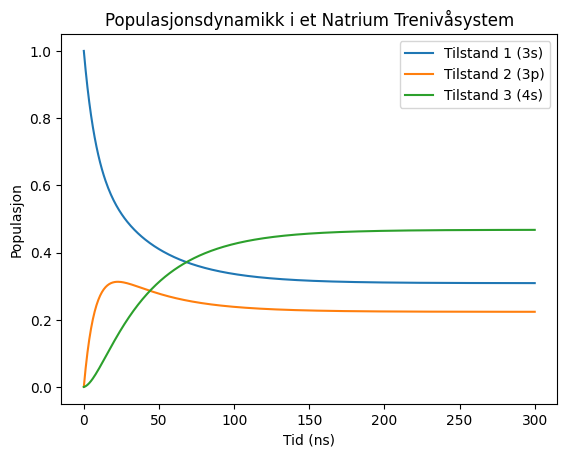

In [71]:
plt.plot(t*1e9, v[0, :])
plt.plot(t*1e9, v[1, :])
plt.plot(t*1e9, v[2, :])
plt.xlabel('Tid (ns)')
plt.ylabel('Populasjon')
plt.legend(['Tilstand 1 (3s)', 'Tilstand 2 (3p)', 'Tilstand 3 (4s)'])
plt.title('Populasjonsdynamikk i et Natrium Trenivåsystem')

In [44]:
v[1, :]

array([2.67272947e-16, 3.12067098e-01, 2.90929134e-01, 2.64118979e-01,
       2.47389929e-01, 2.37515644e-01, 2.31724841e-01, 2.28331439e-01,
       2.26343096e-01, 2.25178052e-01, 2.24495410e-01, 2.24095425e-01,
       2.23861059e-01, 2.23723736e-01, 2.23643274e-01, 2.23596127e-01,
       2.23568503e-01, 2.23552317e-01, 2.23542833e-01, 2.23537276e-01,
       2.23534019e-01, 2.23532112e-01, 2.23530994e-01, 2.23530339e-01,
       2.23529955e-01, 2.23529730e-01, 2.23529598e-01, 2.23529521e-01,
       2.23529476e-01, 2.23529449e-01, 2.23529434e-01, 2.23529425e-01,
       2.23529419e-01, 2.23529416e-01, 2.23529414e-01, 2.23529413e-01,
       2.23529413e-01, 2.23529412e-01, 2.23529412e-01, 2.23529412e-01,
       2.23529412e-01, 2.23529412e-01, 2.23529412e-01, 2.23529412e-01,
       2.23529412e-01, 2.23529412e-01, 2.23529412e-01, 2.23529412e-01,
       2.23529412e-01, 2.23529412e-01])

In [ ]:
egenvektorer_og_egenverdier

## Python Implementering

Her er hvordan du kan løse dette systemet numerisk:

```python
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definer rate-matrisen A (i enheter av 10^7 s^-1)
A = np.array([
    [-(5.0 + 0.1), 6.0, 0.5],
    [5.0, -(6.0 + 3.0), 1.0],
    [0.1, 3.0, -(1.0 + 0.5)]
]) * 1e7  # Konverter til s^-1

# Startpopulasjonsvektor (all populasjon i tilstand 1)
n0 = np.array([1.0, 0.0, 0.0])

# Definer systemet av ODE-er
def rate_equations(t, n):
    return A @ n

# Løs systemet
t_span = (0, 1e-6)  # Tidsrom i sekunder
sol = solve_ivp(rate_equations, t_span, n0, t_eval=np.linspace(0, 1e-6, 1000))

# Plott resultatene
plt.plot(sol.t * 1e9, sol.y.T)  # Konverter tid til nanosekunder
plt.xlabel('Tid (ns)')
plt.ylabel('Populasjon')
plt.legend(['Tilstand 1 (3s)', 'Tilstand 2 (3p)', 'Tilstand 3 (4s)'])
plt.title('Populasjonsdynamikk i et Natrium Trenivåsystem')
plt.show()

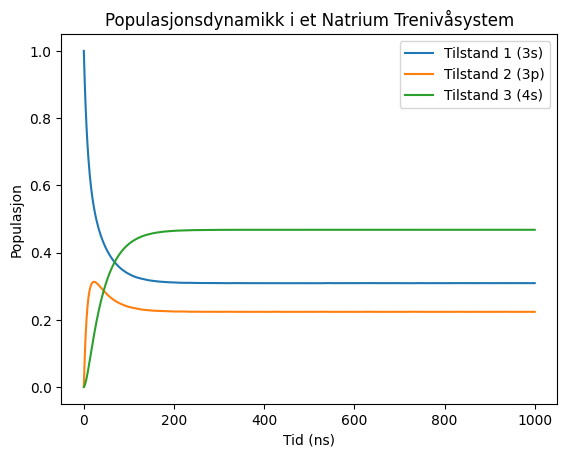

In [51]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definer rate-matrisen A (i enheter av 10^7 s^-1)
A = np.array([
    [-(5.0 + 0.1), 6.0, 0.5],
    [5.0, -(6.0 + 3.0), 1.0],
    [0.1, 3.0, -(1.0 + 0.5)]
]) * 1e7  # Konverter til s^-1

# Startpopulasjonsvektor (all populasjon i tilstand 1)
n0 = np.array([1.0, 0.0, 0.0])

# Definer systemet av ODE-er
def rate_equations(t, n):
    return A @ n

# Løs systemet
t_span = (0, 1e-6)  # Tidsrom i sekunder
sol = solve_ivp(rate_equations, t_span, n0, t_eval=np.linspace(0, 1e-6, 1000))

# Plott resultatene
plt.plot(sol.t * 1e9, sol.y.T)  # Konverter tid til nanosekunder
plt.xlabel('Tid (ns)')
plt.ylabel('Populasjon')
plt.legend(['Tilstand 1 (3s)', 'Tilstand 2 (3p)', 'Tilstand 3 (4s)'])
plt.title('Populasjonsdynamikk i et Natrium Trenivåsystem')
plt.show()